In [1]:
import sys 
import os 
sys.path.append(os.path.abspath("../"))
from src.Limma import batchEffectCorrection
from src.MetNormalizer import MetNorm
from utils.utility_functions import pca_plot,detection,TIC
import pandas as pd
import numpy as np
from inmoose.pycombat import pycombat_norm

removing blanks
returning accepted signals


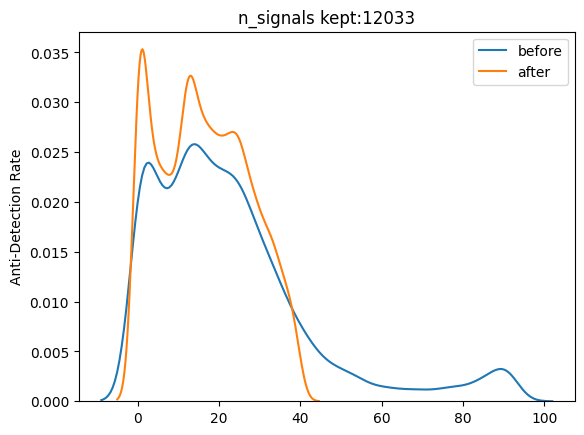

In [2]:
D = pd.read_csv("Data/2-peak_area_after_filling_missing_values.csv").set_index("position").drop(columns=['mz','rt','name']).T
M = pd.read_csv("Data/sample_metadata_all_batches.csv").set_index("sample_name")
D = D[~D.index.str.contains("_B_")]
M = M[~M.index.str.contains("_B_")]
D = D.drop(index='AOU_S_0104')
M = M.drop(index='AOU_S_0104')
D = D[detection(D,limit=0.40).index]
D = TIC(D,scale=True)
D = np.log2(D)

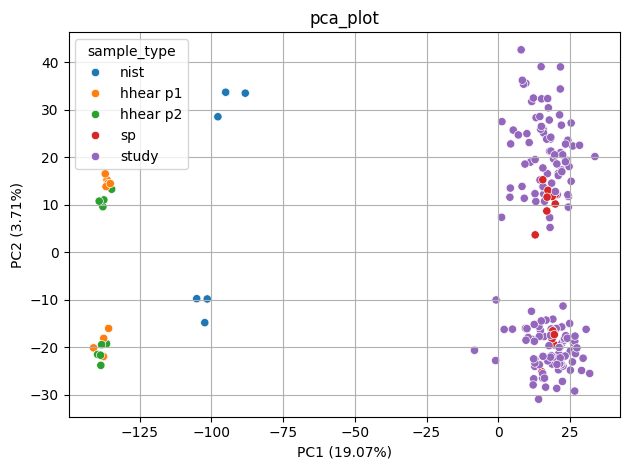

In [3]:
pca_plot(D,M)

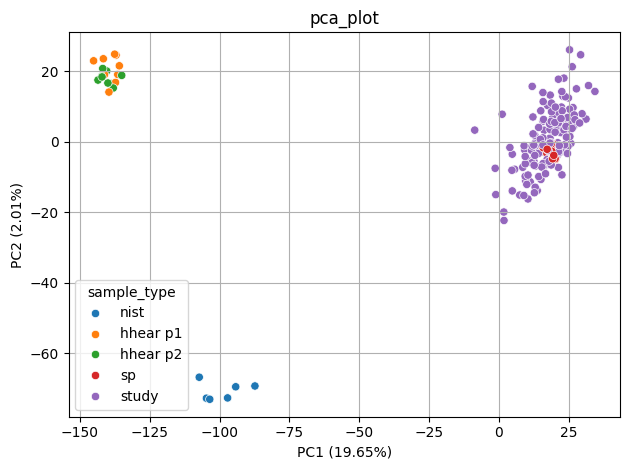

In [4]:
batch = M.loc[D.index,'batch']
combat = pycombat_norm(D.T,batch).T
pca_plot(combat,M)

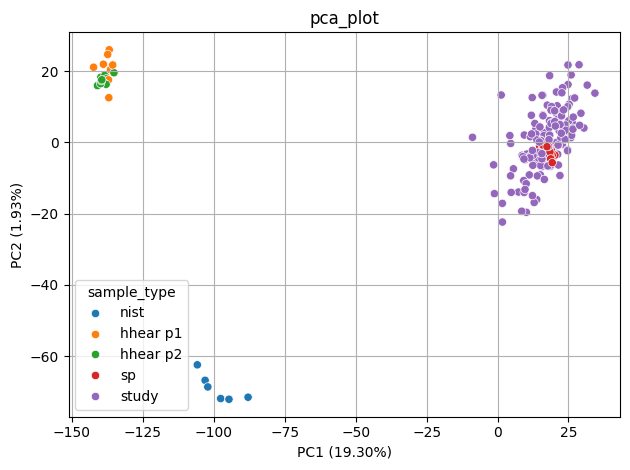

In [5]:
limma = batchEffectCorrection(D.T,M)
pca_plot(limma,M,hue='sample_type')

In [6]:
limmar = pd.read_csv("Data/limma_ref.csv").rename(columns={"Unnamed: 0":"name"}).set_index("name").T

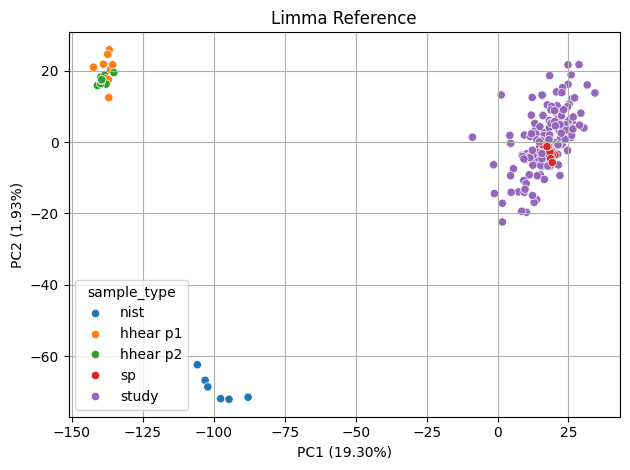

In [7]:
pca_plot(limmar,M,title='Limma Reference')

## MetNormalizer 

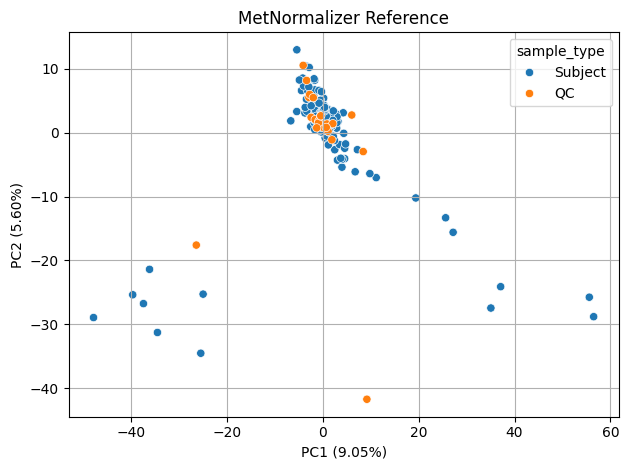

In [8]:
D = pd.read_csv("Data/metnor.csv").drop(columns=["mz",'rt']).set_index("name").T
M = pd.read_csv("Data/sample.info.csv").rename(columns={"sample.name":"sample_name","class":"sample_type"}).set_index("sample_name")
metNor = pd.read_csv("Data/data_svr_normalization.csv").drop(columns=["Unnamed: 0",'mz','rt','sample.nor.rsd','QC.nor.rsd']).set_index("name")
pca_plot(metNor.T,M,title='MetNormalizer Reference')

In [9]:
D.index= D.index.str.replace("QC","_SP_")
metnorm = MetNorm(D,M,cv=False)
results = metnorm.fit_transform()
results.index = results.index.str.replace("_SP_","QC")

In [10]:
metnorm.model

,kernel,'rbf'
,degree,3
,gamma,'auto'
,coef0,0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [11]:
results

,1,2,3,4,5,6,7,8,9,10,...,1342,1343,1344,1345,1346,1347,1348,1349,1350,1351
QC1,1.015313,1.019674,1.126811,1.035470,1.248394,1.024243,1.064163,1.022755,1.008130,0.880773,...,1.013836,0.817680,1.007005,1.006602,0.616879,0.986373,0.778455,1.015129,0.984922,1.307151
QC2,1.014847,1.019481,1.055853,1.006667,1.023814,0.918223,1.104415,0.999753,1.035403,0.850487,...,0.958295,0.803475,1.007898,1.007541,0.937209,0.950428,0.928653,1.191512,1.012552,1.003378
QC3,1.056158,0.995321,0.992185,1.039493,1.035825,0.817737,1.012803,1.020386,0.960583,0.924233,...,0.962472,1.062116,1.014763,1.007871,0.953418,1.012990,0.921706,1.119735,0.987405,1.000397
QC4,0.962299,0.995309,0.996609,0.993194,0.981842,1.243134,1.123774,1.005247,0.990798,0.952745,...,0.978152,0.793915,0.967990,0.930014,1.041027,1.029076,1.180769,0.996254,1.002180,0.997569
QC5,1.003343,0.976715,0.972914,1.007273,0.971784,0.980868,0.984589,1.012166,0.990984,0.917605,...,1.028149,0.794358,1.008388,0.992158,1.024390,0.986156,1.431331,0.912313,0.987203,0.992522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S150,1.040626,0.975741,0.983603,1.004764,0.994743,1.041644,1.038074,0.851715,0.924540,1.343890,...,0.859312,1.092999,1.057795,1.026494,0.963119,1.023404,0.506565,0.930933,0.960159,0.960279
S151,1.082756,1.018286,0.982572,0.925359,1.134735,0.769661,0.827687,0.753552,0.967714,1.062584,...,0.910499,0.575038,0.808647,1.147566,1.015497,1.017495,0.663969,0.820900,0.957344,1.088837
S152,1.018853,0.938967,0.953760,0.969873,0.671795,1.045781,1.040490,0.848177,1.000478,1.055350,...,0.879002,0.371633,0.803349,0.996903,1.020172,1.054273,1.018715,1.076127,0.948467,0.999633
S153,1.046277,0.969348,0.964832,1.012434,0.830539,0.932413,1.047891,0.808514,1.014272,1.080451,...,0.862051,0.454313,0.824149,1.030212,1.011849,1.025597,0.431760,1.058789,0.949175,1.036193


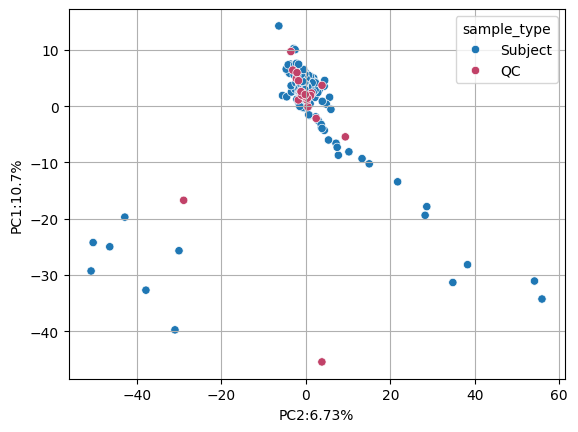

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
pca = PCA(n_components=2)

pca_df = pd.DataFrame(pca.fit_transform(StandardScaler().fit_transform(results)),index=results.index,columns=["PC1","PC2"])

pca_df["sample_type"] = M['sample_type']


sns.scatterplot(pca_df[pca_df['sample_type'] == 'Subject'],x='PC1',y='PC2',hue='sample_type')
sns.scatterplot(pca_df[pca_df['sample_type'] != 'Subject'],x='PC1',y='PC2',hue='sample_type',palette='flare')
plt.xlabel(f"PC2:{np.round(pca.explained_variance_ratio_[1] * 100,2)}%")
plt.ylabel(f"PC1:{np.round(pca.explained_variance_ratio_[0] * 100,2)}%")
plt.grid(True)